<a href="https://colab.research.google.com/github/sowmR/pythonImageProcessing/blob/master/simple_ITK_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc("image", aspect="equal")
import SimpleITK as sitk

# Read Image


In [7]:
# Image Path
rootPath = r'./sample_data/'
imageFileName = 'Sample_heart'
imgExtn = '.png'
imgPath = os.path.join(rootPath,imageFileName+imgExtn)
image = None
if os.path.isfile(imgPath):
    image = sitk.ReadImage(imgPath, imageIO="PNGImageIO")

# Image Info

In [8]:
if image is not None:
    print("Size: ",image.GetSize())
    print("Origin: ",image.GetOrigin())
    print("Spacing: ", image.GetSpacing())
    print("Direction: ",image.GetDirection())
    print("Number of components: ", image.GetNumberOfComponentsPerPixel())
    print("width: ", image.GetWidth())
    print("height: ", image.GetHeight())
    print("depth: ",image.GetDepth())
    print("Dimension: ",image.GetDimension())
    print("Pixel ID: ",image.GetPixelIDValue())
    print("PixelID string: ", image.GetPixelIDTypeAsString())

Size:  (1656, 1032)
Origin:  (0.0, 0.0)
Spacing:  (1.0, 1.0)
Direction:  (1.0, 0.0, 0.0, 1.0)
Number of components:  4
width:  1656
height:  1032
depth:  0
Dimension:  2
Pixel ID:  13
PixelID string:  vector of 8-bit unsigned integer


In [9]:
# Get a view of the image data as a numpy array, useful for display
nda = sitk.GetArrayViewFromImage(image)

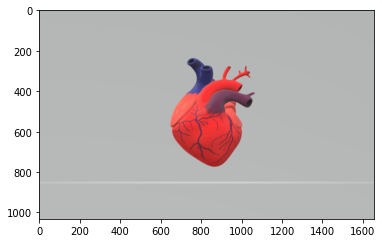

In [10]:
plt.imshow(nda)

# Transformations

In [11]:
basic_transform = sitk.Euler2DTransform()
basic_transform.SetTranslation((2,3))

sitk.WriteTransform(basic_transform, 'euler2D.tfm')
read_result = sitk.ReadTransform('euler2D.tfm')


(0.0, 0.0, 0.0, 0.0, 0.0)


TypeError: ignored

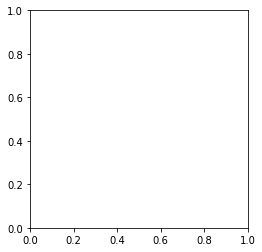

In [12]:
image = sitk.Image([10,10], sitk.sitkVectorFloat32, 5)
image.SetOrigin((3.0, 14.0))
image.SetSpacing((0.5, 2))
image.TransformIndexToPhysicalPoint((0,0))
print(image.GetPixel((0,0)))
nda = sitk.GetArrayViewFromImage(image)
plt.imshow(nda)